# Лабораторна робота №3. Кластеризацій. Аналіз даних.

У цій лабораторній завданням буде розділити вина по сегментах користувачів.
__Важливо відмітити, що у датасеті, який буде використовуватись є відмітки, до якого сегменту відноситься вино, але вони не будуть використовуватись.__

#### Імпортуйте бібліотеки pandas, matplotlib та класс KMeans з бібліотеки sklearn.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

#### Зчитайте дані з файлу `wine.csv` у датафрейм `wine`

In [3]:
wine = pd.read_csv('wine.csv') 
wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


#### Побудуйте точоковий графік з отриманого датафрейму, де по осі `x` розташовані значення `Alcohol`, а по осі `y` значення `Proline`.

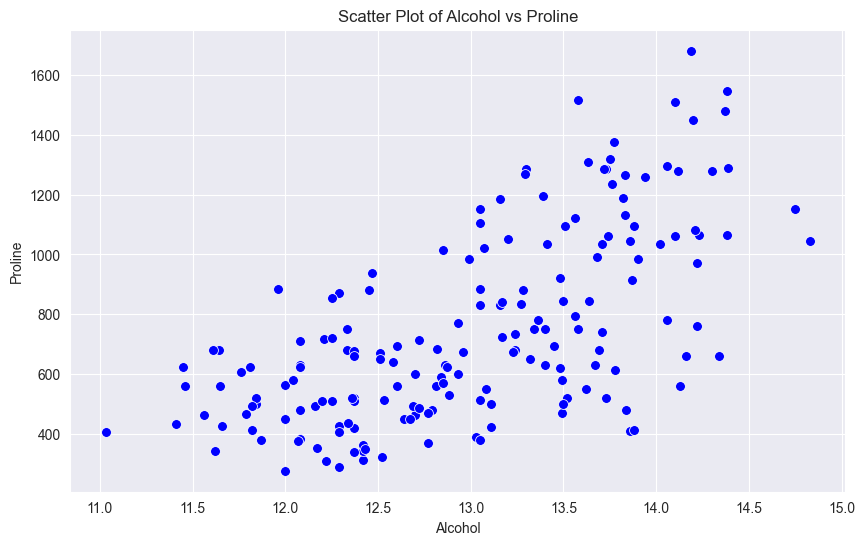

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wine, x='Alcohol', y='Proline', s=50, color='blue')
plt.title('Scatter Plot of Alcohol vs Proline')
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.show()

<AxesSubplot:xlabel='Alcohol', ylabel='Proline'>

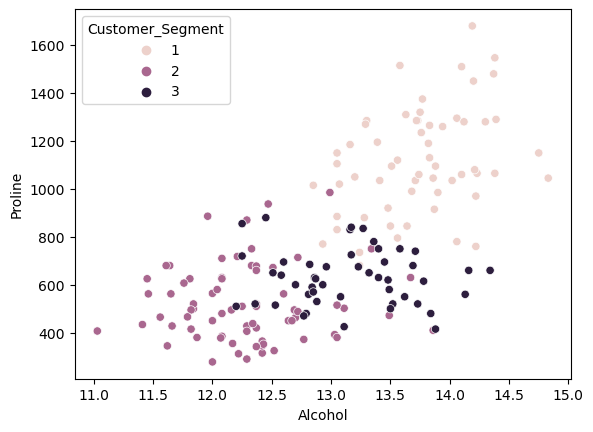

#### Побудуйте точоковий графік з отриманого датафрейму, де по осі `x` розташовані значення `Proline` а по осі `y` значення `OD280`.

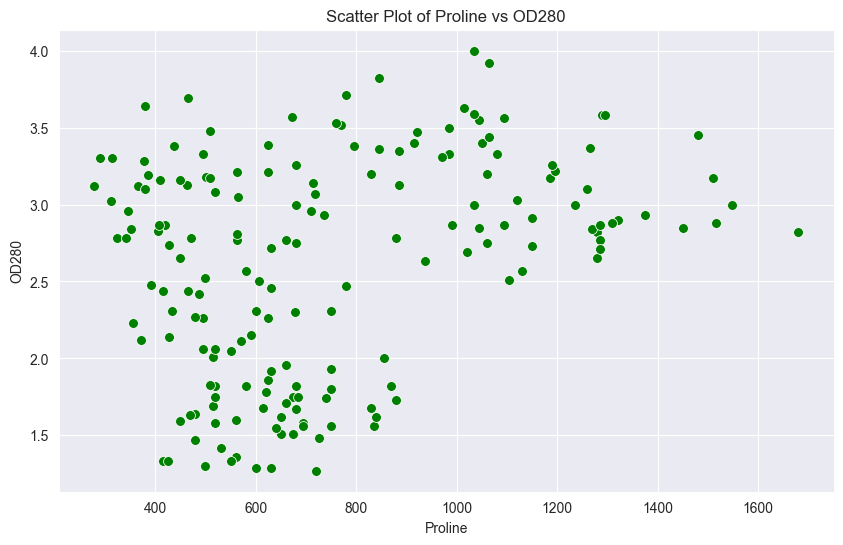

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wine, x='Proline', y='OD280', s=50, color='viridis')
plt.title('Scatter Plot of Proline vs OD280')
plt.xlabel('Proline')
plt.ylabel('OD280')
plt.show()

<AxesSubplot:xlabel='Proline', ylabel='OD280'>

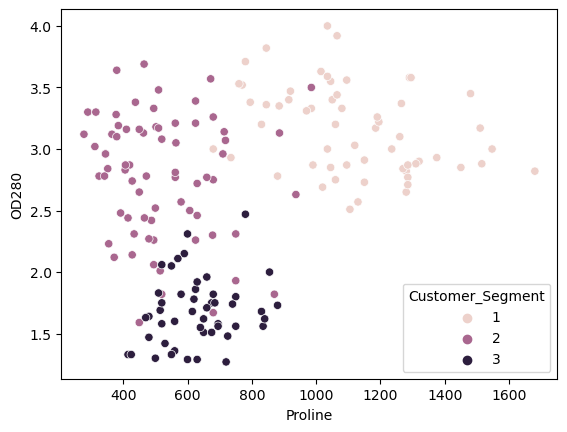

## K-Means.

#### Імпортуйте клас KMeans з бібілотеки sklearn.

#### Створіть об'єкт класу KMeans з трьома кластерами. У конструктор передайте параметр  random_state=32, щоб мати однакові параметри ініціалізації центроїдів з прикладами.


In [7]:
kmeans = KMeans(n_clusters=3, random_state=32)
kmeans

KMeans(n_clusters=3, random_state=32)

KMeans(n_clusters=3, random_state=32)

#### Натренуйте модель на даних з датафрейму. Виведіть значення поля labels_ з отриманого результату.

In [10]:
kmeans.fit(wine[['Proline', 'OD280']])
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

KMeans(n_clusters=3, random_state=32)

#### Виведіть отримані центри кластерів.

In [12]:
centers = kmeans.cluster_centers_
centers

[[ 458.23188406    2.49072464]
 [1195.14893617    3.11404255]
 [ 728.33870968    2.36548387]]


array([[1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02, 2.25806452e+00],
       [1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03, 1.02127660e+00],
       [1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02, 2.27536232e+00]])

#### Побудуйте точкові графіки порівняння кластерів, отриманих з використанням K-Means та справжніх результатів. По осі _x_ задайте значення  _Proline_ а по осі _y_ значення _OD280_. Для розподілу по кластерах використайте параметр __c=__ з функції _scatter_.

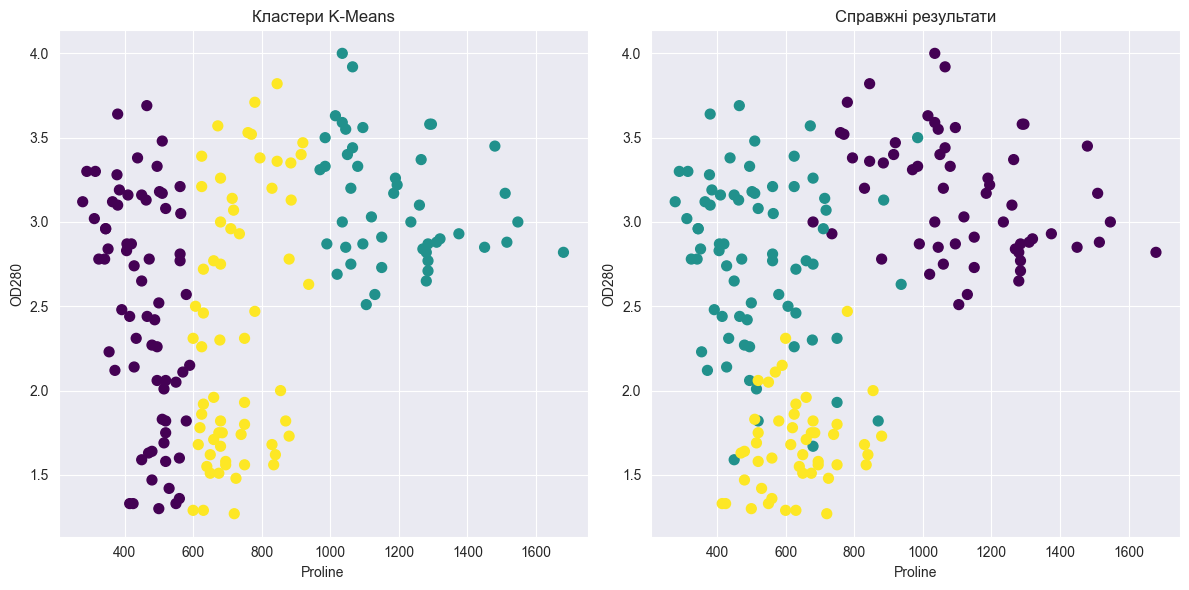

In [19]:
true_labels = wine['Customer_Segment']  # Замість 'WineType' використайте ваш фактичний стовпець

# Побудуйте точкові графіки порівняння кластерів
plt.figure(figsize=(12, 6))

# Графік кластерів, отриманих з K-Means
plt.subplot(1, 2, 1)
plt.scatter(wine['Proline'], wine['OD280'], c=labels, cmap='viridis', s=50)
plt.title('Кластери K-Means')
plt.xlabel('Proline')
plt.ylabel('OD280')

# Графік справжніх результатів
plt.subplot(1, 2, 2)
plt.scatter(wine['Proline'], wine['OD280'], c=true_labels, cmap='viridis', s=50)
plt.title('Справжні результати')
plt.xlabel('Proline')
plt.ylabel('OD280')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'OD280')

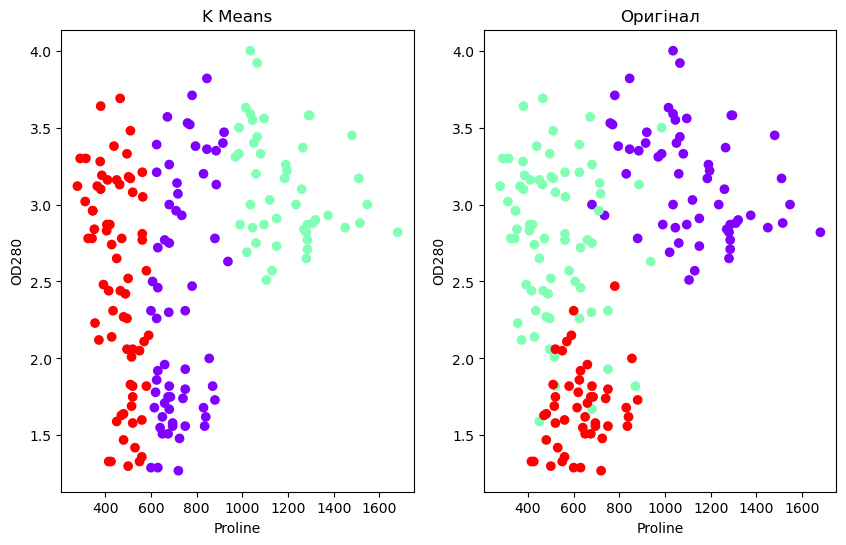

#### Побудуйте точкові графіки порівняння кластерів, отриманих з використанням K-Means та справжніх результатів. По осі _x_ задайте значення  _Alcohol_ а по осі _y_ значення _Proline_. Для розподілу по кластерах використайте параметр __c=__ з функції _scatter_.

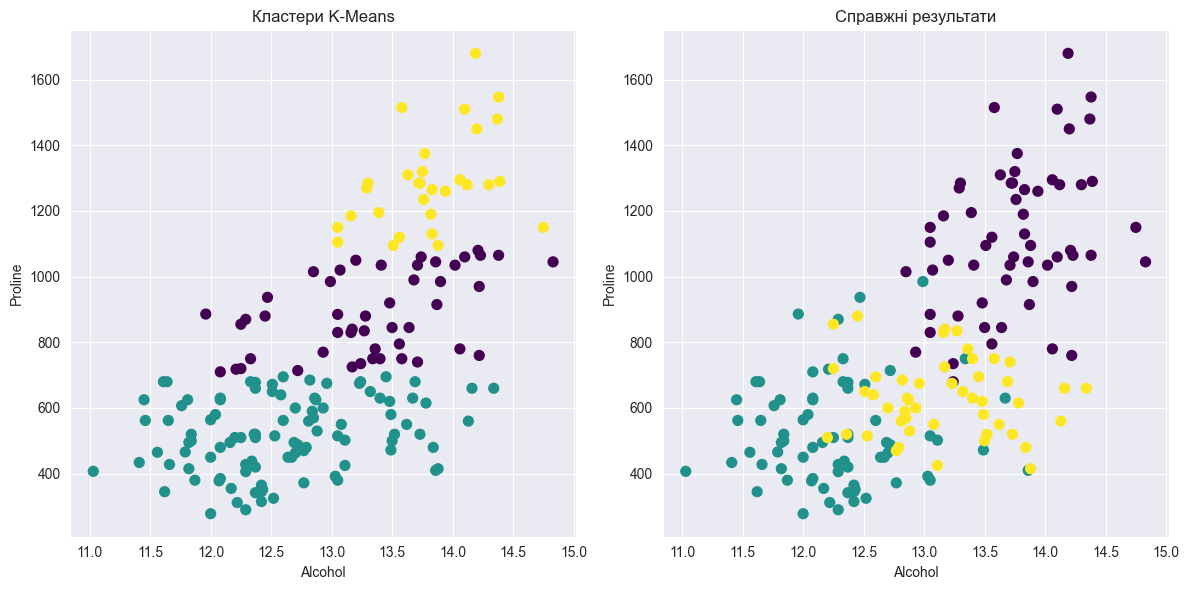

In [22]:
kmeans = KMeans(n_clusters=3)  # Задайте кількість кластерів
labels = kmeans.fit_predict(wine[['Alcohol', 'Proline']])  # Використовуйте тільки ці два стовпці
true_labels = wine['Customer_Segment']

# Побудова точкових графіків
plt.figure(figsize=(12, 6))

# Графік кластерів, отриманих з K-Means
plt.subplot(1, 2, 1)
plt.scatter(wine['Alcohol'], wine['Proline'], c=labels, cmap='viridis', s=50)
plt.title('Кластери K-Means')
plt.xlabel('Alcohol')
plt.ylabel('Proline')

# Графік справжніх результатів
plt.subplot(1, 2, 2)
plt.scatter(wine['Alcohol'], wine['Proline'], c=true_labels, cmap='viridis', s=50)
plt.title('Справжні результати')
plt.xlabel('Alcohol')
plt.ylabel('Proline')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Proline')

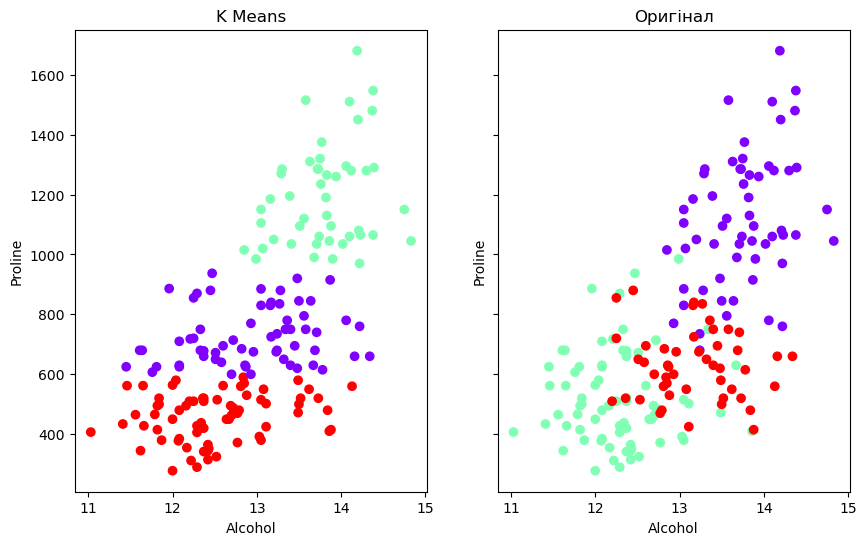

# Агломеративна кластеризація.

#### Імпортуйте клас AgglomerativeClustering з бібілотеки sklearn.

In [23]:
from sklearn.cluster import AgglomerativeClustering

#### Створіть об'єкт класу AgglomerativeClustering з трьома кластерами. 

In [26]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering

AgglomerativeClustering(n_clusters=3)

AgglomerativeClustering(n_clusters=3)

#### Натренуйте кластеризатор даними з датафрейму з винами.

In [28]:
X = wine[['Alcohol', 'Proline']]
labels = agg_clustering.fit_predict(X)
wine['Agglo_Labels'] = labels
wine


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,Agglo_Labels
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3,1


AgglomerativeClustering(n_clusters=3)

#### Побудуйте точкові графіки порівняння кластерів, отриманих з використанням K-Means та справжніх результатів. По осі _x_ задайте значення  _Proline_ а по осі _y_ значення _OD280_. Для розподілу по кластерах використайте параметр __c=__ з функції _scatter_.

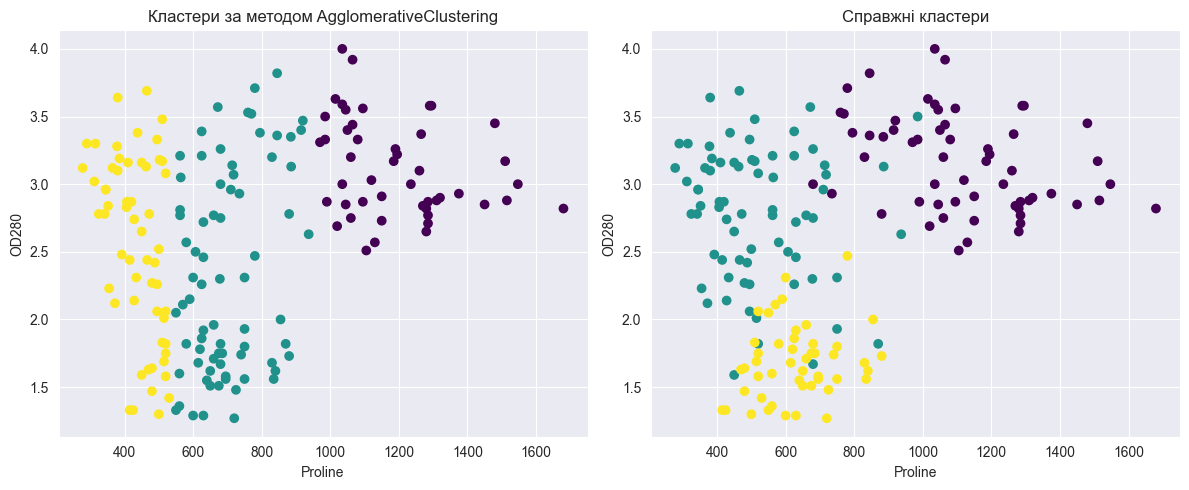

In [30]:
from sklearn.preprocessing import LabelEncoder
X = wine[['Proline', 'OD280']]
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X)

true_labels = LabelEncoder().fit_transform(wine['Customer_Segment'])

plt.figure(figsize=(12, 5))

# Перший графік - результати кластеризації AgglomerativeClustering
plt.subplot(1, 2, 1)
plt.scatter(wine['Proline'], wine['OD280'], c=agg_labels, cmap='viridis')
plt.title('Кластери за методом AgglomerativeClustering')
plt.xlabel('Proline')
plt.ylabel('OD280')

# Другий графік - справжні результати
plt.subplot(1, 2, 2)
plt.scatter(wine['Proline'], wine['OD280'], c=true_labels, cmap='viridis')
plt.title('Справжні кластери')
plt.xlabel('Proline')
plt.ylabel('OD280')

plt.tight_layout()
plt.show()


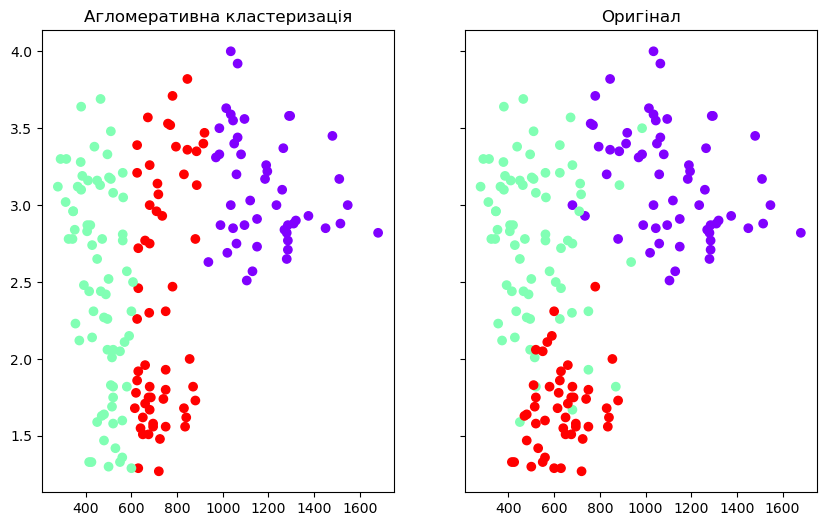

#### Побудуйте точкові графіки порівняння кластерів, отриманих з використанням K-Means та справжніх результатів. По осі _x_ задайте значення  _Alcohol_ а по осі _y_ значення _Proline_. Для розподілу по кластерах використайте параметр __c=__ з функції _scatter_.

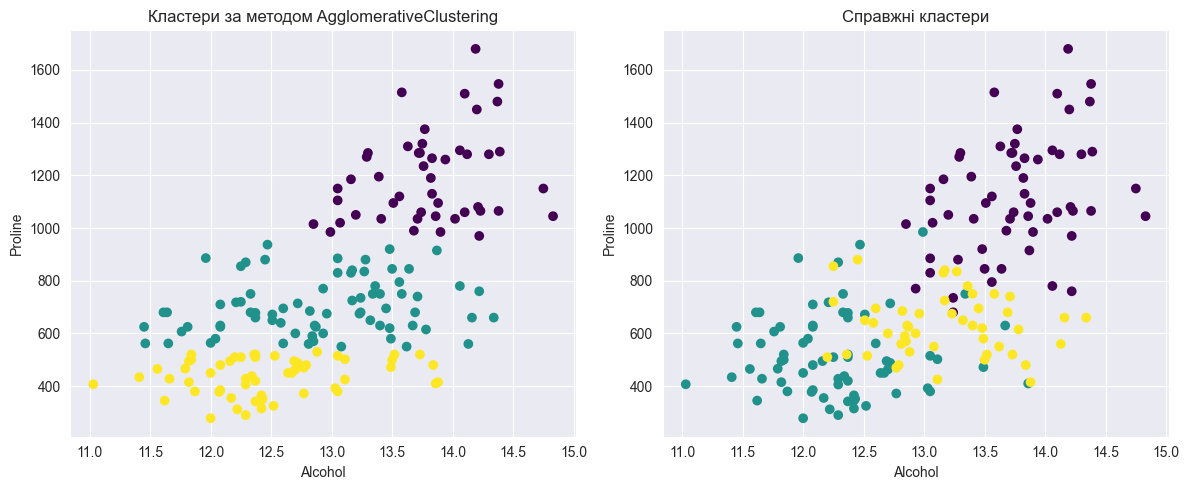

In [31]:
# Виберіть стовпці для кластеризації
X = wine[['Alcohol', 'Proline']]

agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X)

true_labels = LabelEncoder().fit_transform(wine['Customer_Segment'])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(wine['Alcohol'], wine['Proline'], c=agg_labels, cmap='viridis')
plt.title('Кластери за методом AgglomerativeClustering')
plt.xlabel('Alcohol')
plt.ylabel('Proline')

plt.subplot(1, 2, 2)
plt.scatter(wine['Alcohol'], wine['Proline'], c=true_labels, cmap='viridis')
plt.title('Справжні кластери')
plt.xlabel('Alcohol')
plt.ylabel('Proline')

plt.tight_layout()
plt.show()


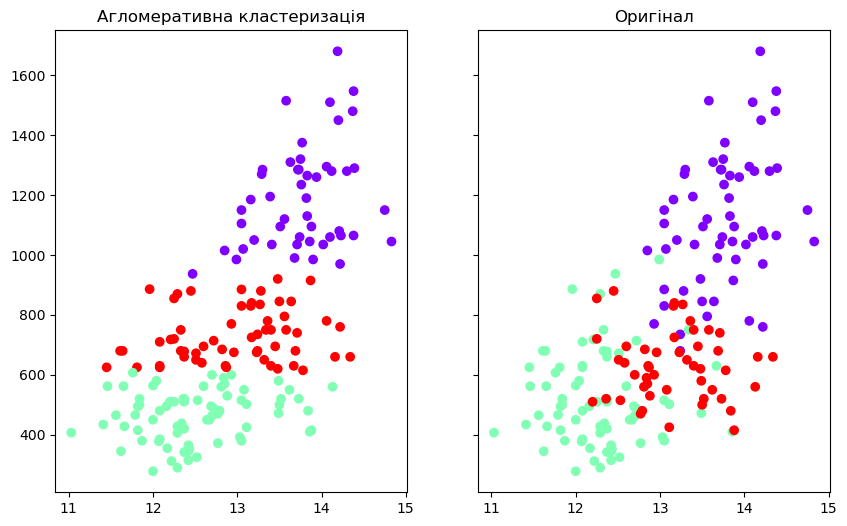

### Дендрограми.

#### Імпортуйте клас `hierarchy` для побудови дендрограм.

In [9]:
from scipy.cluster import hierarchy

#### Побудуйте дендрограму для даних про вина.

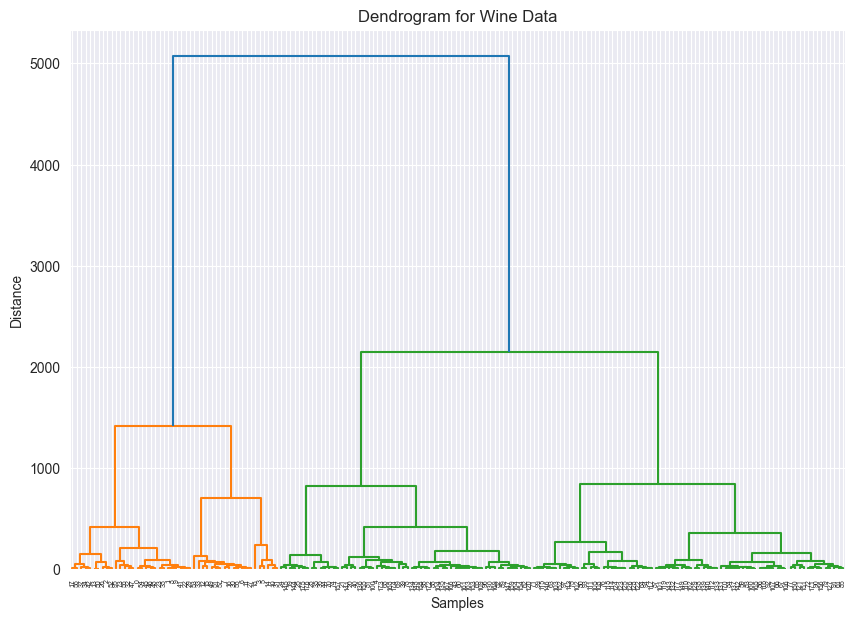

In [10]:
# Завантаження даних
data = pd.read_csv('wine.csv')

# Використання тільки числових характеристик для кластеризації
X = data.select_dtypes(include='number')

Z = hierarchy.linkage(X, method='ward')

plt.figure(figsize=(10, 7))
hierarchy.dendrogram(Z)
plt.title("Dendrogram for Wine Data")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

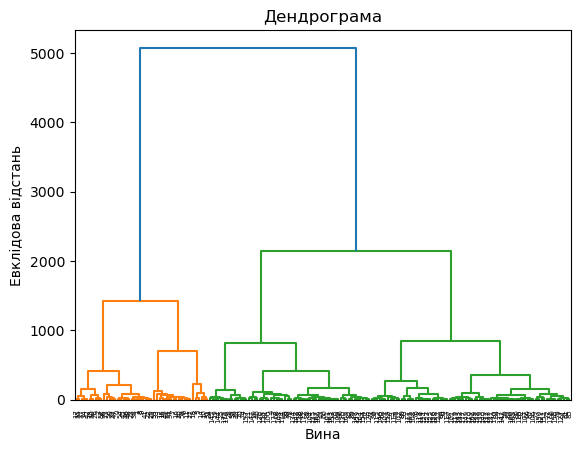

# DBSCAN

Дані для цієї частини лабораторної:

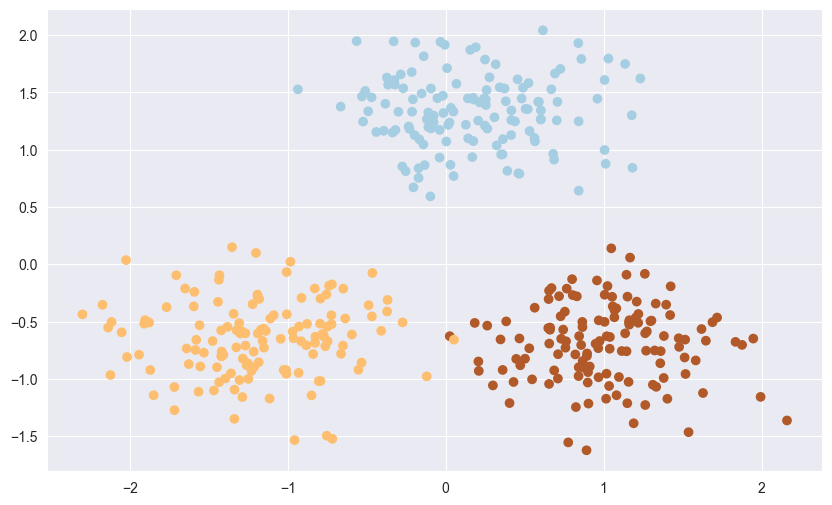

In [34]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

#Determine centroids
centers = [[0.5, 2], [-1, -1], [1.5, -1]]
#Create dataset
X, y = make_blobs(n_samples = 400, centers = centers, 
                  cluster_std = 0.5, random_state = 0)
#Normalize the values
X = StandardScaler().fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'Paired')

#### Імпортуйте клас DBSCAN.

In [35]:
from sklearn.cluster import DBSCAN

#### Створіть об'єкт класу DBSCAN з параметрами __eps = 0.4__, __min_samples = 20__.

In [36]:
dbscan = DBSCAN(eps=0.4, min_samples=20)
dbscan

DBSCAN(eps=0.4, min_samples=20)

DBSCAN(eps=0.4, min_samples=20)

#### Натренуйте створений об'єкт на датафреймі Х.

In [37]:
dbscan.fit(X)

DBSCAN(eps=0.4, min_samples=20)

DBSCAN(eps=0.4, min_samples=20)

#### Побудуйте графік з розподілом точок по кластерах.

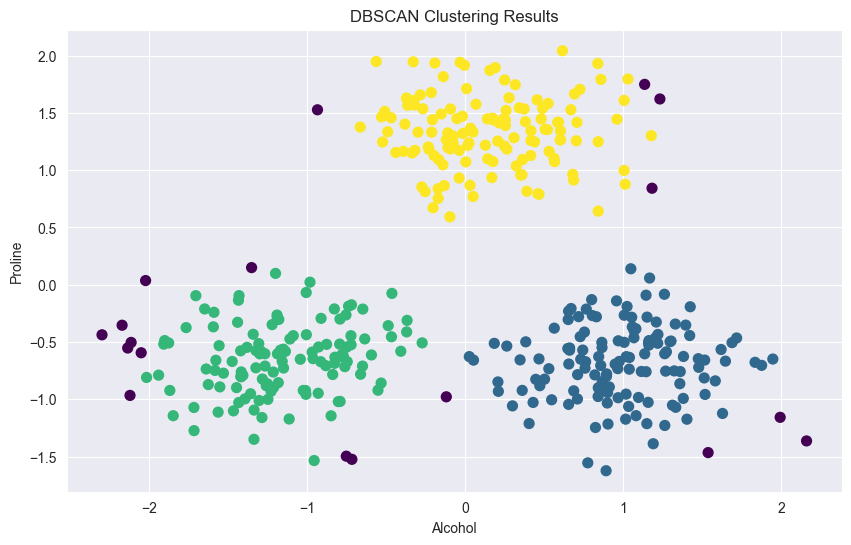

In [44]:
labels = dbscan.labels_
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.title('DBSCAN Clustering Results')
plt.show()

Text(0.5, 1.0, 'Clusters determined by DBSCAN')

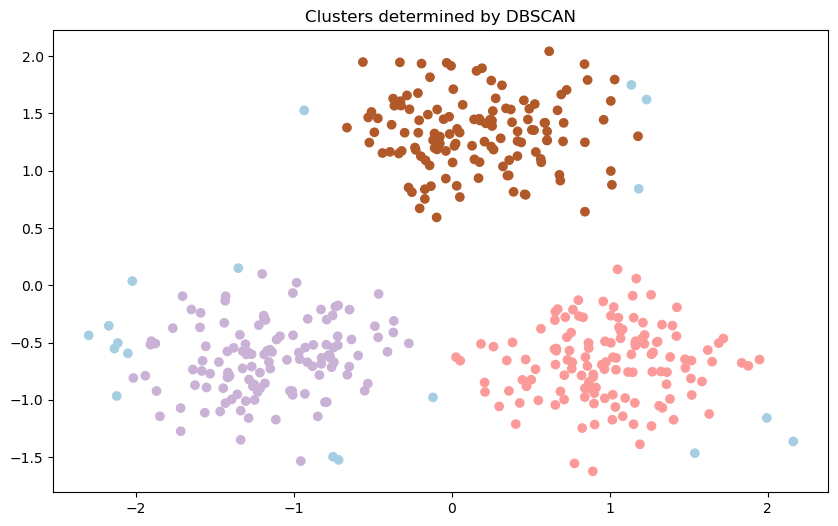

# PCA.
#### Для цієї частини лабораторної використайте датафрейм `wine`. Промасштабуйте дані з допомогою класу `StandardScaler` з пакету _sklearn_. Для цього використайте методи __fit()__ та __transform()__.

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

wine_scaled = scaler.fit_transform(wine)

wine_scaled = pd.DataFrame(wine_scaled)

wine_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944,-1.385503
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944,-1.385503
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944,-1.385503
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944,-1.385503
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944,-0.073697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1.373864,-0.073697
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1.373864,-0.073697
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.373864,-0.073697
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.373864,-0.073697


array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.37386437]])

#### Створіть об'єкт класу `PCA`, який розкладе матрицю ознак по двох основних компонентах.

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca

PCA(n_components=2)

PCA(n_components=2)

#### Натренуйте модель PCA на промасштабованих даних. Використайте методи __fit()__ та __transform()__.

In [53]:
X_pca = pca.fit_transform(wine_scaled)
print(X_pca)


[[-3.85531362  1.22782907]
 [-2.80987983 -0.1352153 ]
 [-3.11016553  0.92344454]
 [-4.33238668  2.37999807]
 [-1.41055351  0.51272315]
 [-3.69651504  1.95664566]
 [-3.12122195  1.19037968]
 [-2.80294445  1.62270804]
 [-3.14165517  0.9430605 ]
 [-3.32128856  0.73938691]
 [-4.01301042  1.12682918]
 [-2.47636702  0.80587988]
 [-2.78977283  0.78702648]
 [-3.99462975  0.97858978]
 [-4.80168014  1.75194873]
 [-3.01189537  1.63178688]
 [-2.91515307  2.21377499]
 [-2.6265133   1.60977887]
 [-4.16560699  2.26574757]
 [-2.38532744  0.596372  ]
 [-3.26670363  0.18446732]
 [-1.44520935 -0.04949361]
 [-3.09493264 -0.03745194]
 [-2.27940683 -0.29900107]
 [-2.02525591 -0.62956119]
 [-1.39884428  0.53950655]
 [-2.48670868  0.80358211]
 [-1.96940065  0.2416198 ]
 [-2.46892538  0.2240233 ]
 [-2.86068164  0.28678636]
 [-3.11849154  1.13526051]
 [-3.31211901  1.40503947]
 [-2.30476911  0.24007265]
 [-2.65692546  1.6414286 ]
 [-2.15031575  0.85102817]
 [-2.16495523 -0.19758116]
 [-1.76887551  0.36181699]
 

array([[-3.5229339 , -1.45309844],
       [-2.52885806,  0.33001925],
       [-2.78502898, -1.03693595],
       [-3.92258841, -2.76821026],
       [-1.40751111, -0.86777309],
       [-3.28812981, -2.13017513],
       [-2.75057754, -1.17916999],
       [-2.39286652, -1.61128232],
       [-2.79525633, -0.92317952],
       [-3.00559666, -0.79628417],
       [-3.67868855, -1.31252342],
       [-2.10963477, -0.61298199],
       [-2.43845636, -0.67852331],
       [-3.67349453, -1.14012136],
       [-4.44157575, -2.11031917],
       [-2.60892387, -1.66641801],
       [-2.47542846, -2.33089672],
       [-2.22623243, -1.63359016],
       [-3.74226929, -2.52840527],
       [-2.3944115 , -1.06452946],
       [-3.33656895, -0.79601279],
       [-1.48140399, -0.24008547],
       [-2.82806867,  0.08685755],
       [-2.00771405,  0.51561649],
       [-2.11463604,  0.31592057],
       [-1.39753751, -0.93821529],
       [-2.13348803, -0.68710205],
       [-1.62970383,  0.09118403],
       [-2.50760753,

#### Побудуйте графік розподілу точок по двох основних компонентах. Задайте параметр __c = wine['Customer_Segment']__.

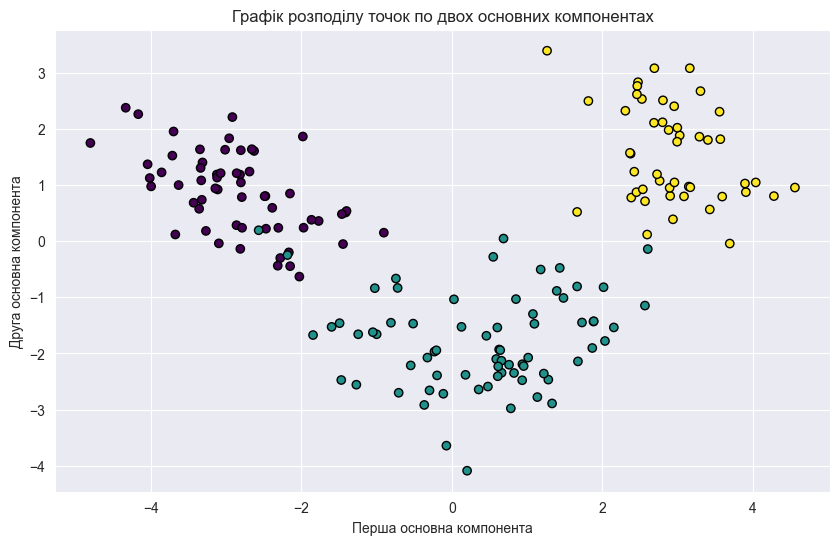

In [60]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=wine['Customer_Segment'], cmap='viridis', edgecolor='k')

plt.xlabel('Перша основна компонента')
plt.ylabel('Друга основна компонента')

plt.title('Графік розподілу точок по двох основних компонентах')

plt.show()

Text(0, 0.5, 'Другий основний компонент')

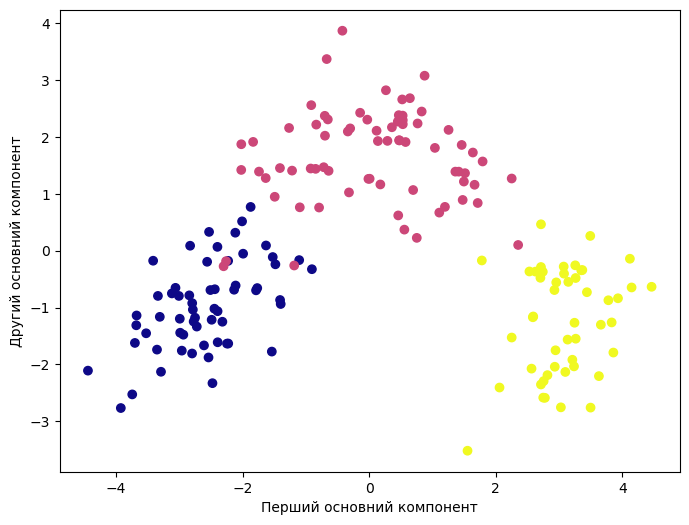

# SVD.
#### Для цієї частини лабораторної використайте датафрейм `wine`. Промасштабуйте дані з допомогою класу `StandardScaler` з пакету `sklearn`. Для цього використайте методи __fit()__ та __transform()__.

In [5]:
from sklearn.preprocessing import StandardScaler

wine = pd.read_csv('wine.csv')

X = wine.iloc[:, :-1]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.37386437]])

#### Створіть об'єкт класу `TruncatedSVD`, який розкладе матрицю ознак по двох основних компонентах.

In [7]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd

TruncatedSVD()

TruncatedSVD()

#### Натренуйте модель TruncatedSVD на промасштабованих даних. Використайте методи __fit()__ та __transform()__.

In [9]:
X_svd = svd.fit_transform(X_scaled)
print(X_svd)

[[ 3.31675081  1.44346263]
 [ 2.20946492 -0.33339289]
 [ 2.51674015  1.0311513 ]
 [ 3.75706561  2.75637192]
 [ 1.00890849  0.86983082]
 [ 3.05025392  2.12240111]
 [ 2.44908967  1.17485013]
 [ 2.05943687  1.60896307]
 [ 2.5108743   0.91807096]
 [ 2.75362819  0.78943767]
 [ 3.47973668  1.30233324]
 [ 1.7547529   0.61197723]
 [ 2.11346234  0.67570634]
 [ 3.45815682  1.13062988]
 [ 4.31278391  2.09597558]
 [ 2.3051882   1.66255173]
 [ 2.17195527  2.32730534]
 [ 1.89897118  1.63136888]
 [ 3.54198508  2.51834367]
 [ 2.0845222   1.06113799]
 [ 3.12440254  0.78689711]
 [ 1.08657007  0.24174355]
 [ 2.53522408 -0.09184062]
 [ 1.64498834 -0.51627893]
 [ 1.76157587 -0.31714893]
 [ 0.9900791   0.94066734]
 [ 1.77527763  0.68617513]
 [ 1.23542396 -0.08980704]
 [ 2.18840633  0.68956962]
 [ 2.25610898  0.19146194]
 [ 2.50022003  1.24083384]
 [ 2.67741105  1.47187364]
 [ 1.62857912  0.05270445]
 [ 1.90269086  1.63306043]
 [ 1.41038853  0.69793432]
 [ 1.90382623  0.17671095]
 [ 1.38486223  0.65863986]
 

array([[-3.5229339 , -1.45309842],
       [-2.52885806,  0.33001927],
       [-2.78502898, -1.03693596],
       [-3.92258841, -2.76821025],
       [-1.40751111, -0.8677731 ],
       [-3.28812981, -2.13017514],
       [-2.75057754, -1.17916996],
       [-2.39286652, -1.6112823 ],
       [-2.79525633, -0.92317954],
       [-3.00559666, -0.79628416],
       [-3.67868855, -1.31252342],
       [-2.10963477, -0.612982  ],
       [-2.43845636, -0.67852331],
       [-3.67349453, -1.14012137],
       [-4.44157575, -2.11031916],
       [-2.60892387, -1.666418  ],
       [-2.47542846, -2.33089674],
       [-2.22623243, -1.63359019],
       [-3.74226929, -2.52840527],
       [-2.3944115 , -1.06452946],
       [-3.33656895, -0.79601278],
       [-1.48140399, -0.24008546],
       [-2.82806867,  0.08685757],
       [-2.00771405,  0.51561651],
       [-2.11463604,  0.31592058],
       [-1.39753751, -0.93821529],
       [-2.13348803, -0.68710205],
       [-1.62970383,  0.09118402],
       [-2.50760753,

#### Побудуйте графік розподілу точок отриманих після декомпозиції. Задайте параметр __c = wine['Customer_Segment']__.

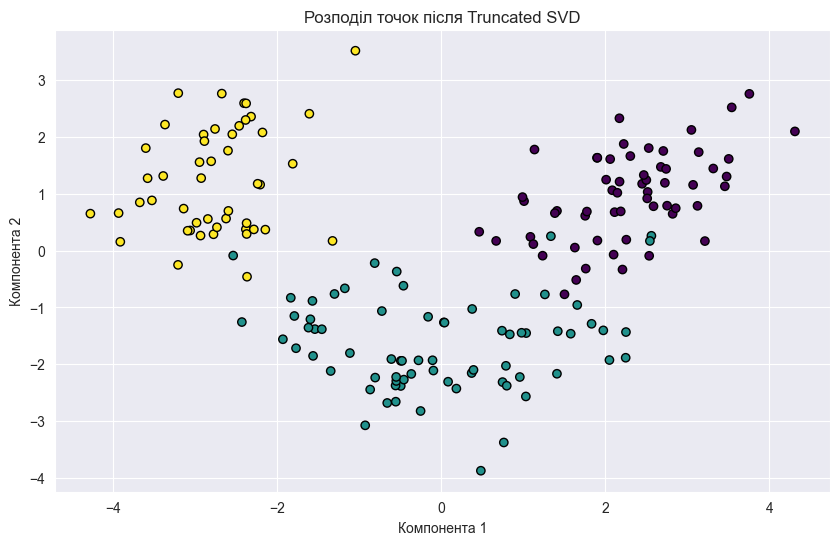

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=wine['Customer_Segment'], cmap='viridis', edgecolor='k')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.title('Розподіл точок після Truncated SVD')
plt.show()

Text(0, 0.5, 'Другий основний компонент')

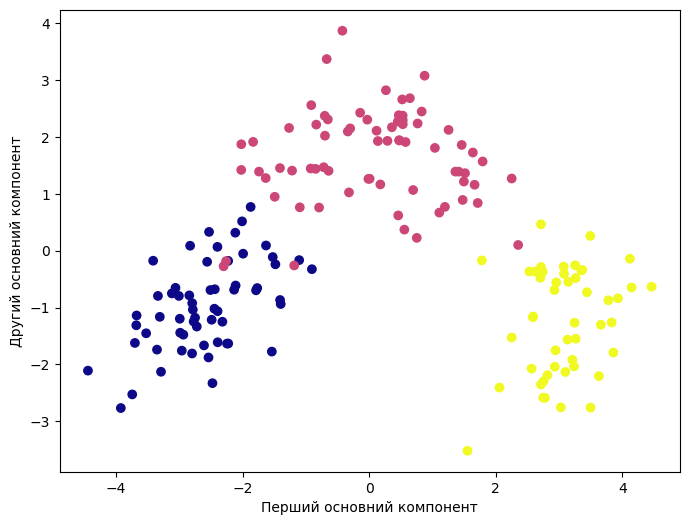